In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

In [2]:
df = pd.read_csv("psi.csv", names=["GRADE", "PSI", "TUCE", "GPA"])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GRADE   32 non-null     int64  
 1   PSI     32 non-null     int64  
 2   TUCE    32 non-null     int64  
 3   GPA     32 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.1 KB


In [4]:
df.describe()

,GRADE,PSI,TUCE,GPA
count,32.000000,32.000000,32.000000,32.000000
mean,0.343750,0.437500,21.937500,3.117188
std,0.482559,0.504016,3.901509,0.466713
min,0.000000,0.000000,12.000000,2.060000
25%,0.000000,0.000000,19.750000,2.812500
50%,0.000000,0.000000,22.500000,3.065000
75%,1.000000,1.000000,25.000000,3.515000
max,1.000000,1.000000,29.000000,4.000000


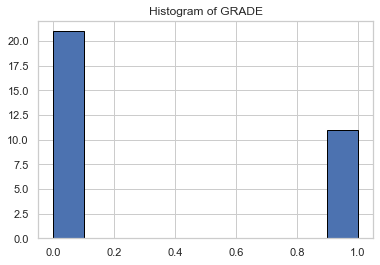

In [5]:
# Check if classes are imbalanced
plt.title("Histogram of GRADE")
df["GRADE"].hist(edgecolor="black")
plt.show()

# Logit Model

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [7]:
# Split data 80:20
X_train, X_test, y_train, y_test = train_test_split(df[["PSI", "TUCE", "GPA"]],
                                                    df["GRADE"],
                                                    test_size=0.2,
                                                    random_state=42)

In [10]:
# Fit model
clf = LogisticRegression(fit_intercept=True)
clf.fit(X_train, y_train);

# Print coefficients and intercept
print(f"Intercept: {clf.intercept_}")
print(f"Coefficients: {clf.coef_}")

Intercept: [-5.62517918]
Coefficients: [[1.07405012 0.07876129 0.8461425 ]]


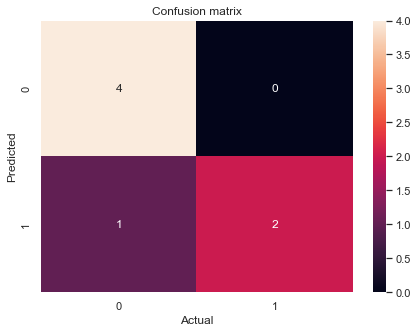

Accuracy of Logit Classifier = 0.86


In [9]:
# Predict values
y_pred = clf.predict(X_test)

# Plot Confusion matrics
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

# Heatmap plot settings
plt.figure(figsize=(7,5))
plt.title("Confusion matrix")
sns.heatmap(cm, annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

# Print Accuracy
acc = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f'Accuracy of Logit Classifier = {acc:.2f}')